# Flights Data Presentation
## Alhassan Atama Isiaka

## Investigation Overview

> Here, I looked at arrival delay of domestic flights in US in 1989. There are factors that cause Arrival delays based on th dataset. I looked at the relationship between it an departure delay with the distance to see how it affects this delay


## Dataset Overview

> The dataset contains about 1,300,000 records with 29 feartures (columns). Some of the fields contain Null values as we saw in the preceeding section

In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('1987.csv.bz2', compression='bz2')
carriers = pd.read_csv("carriers.csv")
#dropping columns we are not going to use since our focus is going to be on delay
df = df.drop(['FlightNum','TailNum','AirTime','TaxiIn','TaxiOut','Cancelled','CarrierDelay', \
              'CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],1)

> We cleaned the data, removed blank fields and made a histogram to do Univariate analysis

## Distribution of Arrival Delay

> We cleaned the data, removed blank fields and made a histogram to do Univariate analysis

<module 'matplotlib.pyplot' from '/Users/alhassan.isiaka/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

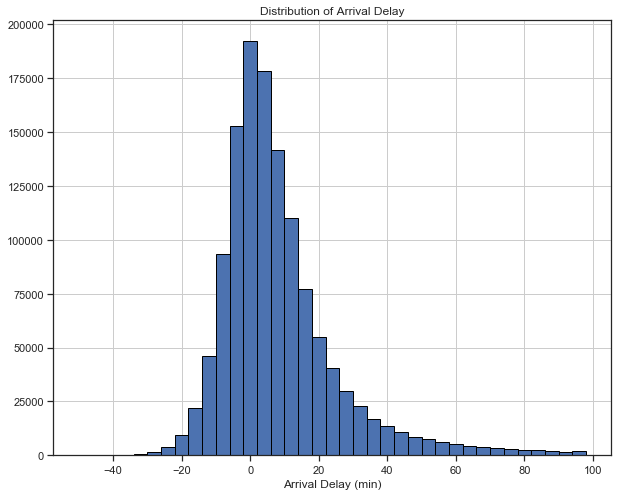

In [58]:
bin = np.arange(-50, 100, 4)
plt.figure(figsize=(10,8)) 
plt.hist(data=df, x="ArrDelay", bins=bin, ec='black')
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (min)")
plt.grid(b=None, which='major', axis='both')
plt

## Distribution of Departure Delay

> Departure delay as a uivariate variable

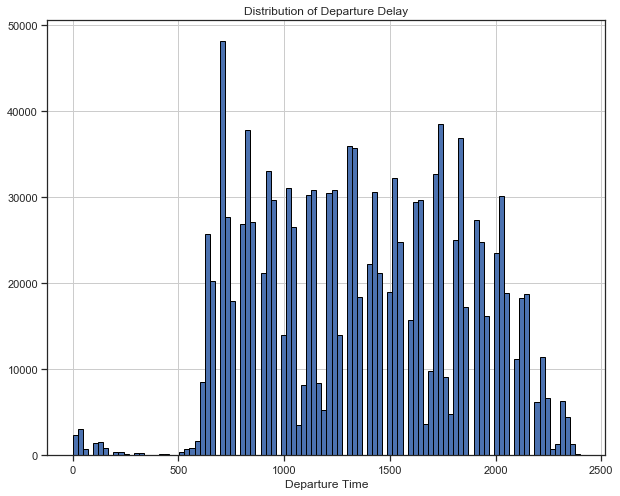

In [60]:
plt.figure(figsize=(10,8))
plt.hist(data=df, x="DepTime", bins=100, ec='black')
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Time")
plt.grid(b=None, which='major', axis='both')

 ## Distance Distribution
 >## Distribution of distance show that distance is right skewed and delay decreases with increasing distance

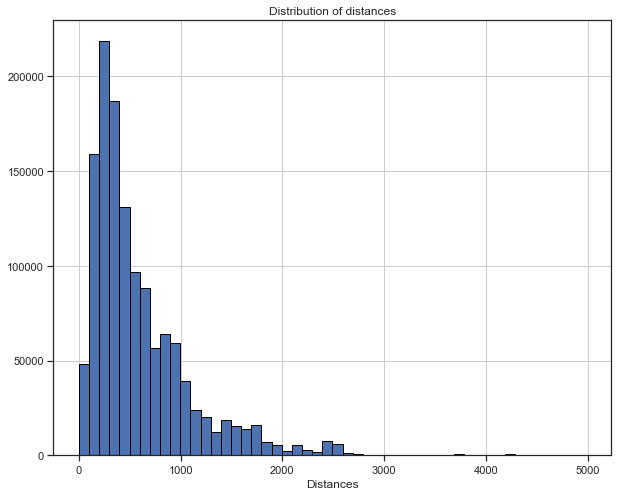

In [61]:
plt.figure(figsize=(10,8)) 
plt.hist(data=df, x="Distance", bins=50, ec='black')
plt.title("Distribution of distances")
plt.xlabel("Distances")
plt.grid(b=None, which='major', axis='both')

## Bivariate Visualization

> We will lok at the relationship between two variables. First we compare arrival and departure time

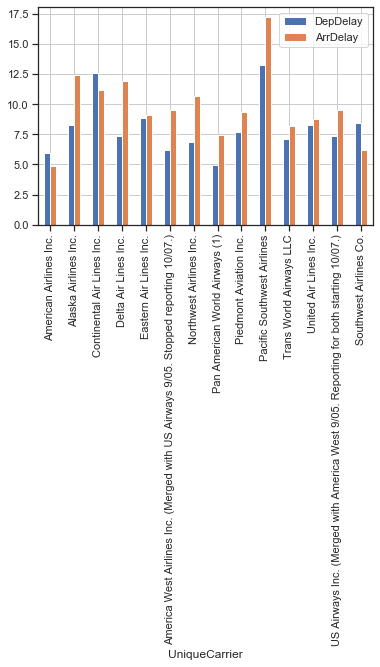

In [66]:
carrier_pair = dict(carriers.values)
ax = df.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}) \
            .rename(index=carrier_pair).plot.bar(subplots=False).grid(b=None, which='major', axis='both')

## Relationship between between distance to both arrival and departure

> We will lok at the relationship between between distance to both arrival and departure delay on a joint plot

<Figure size 1152x432 with 0 Axes>

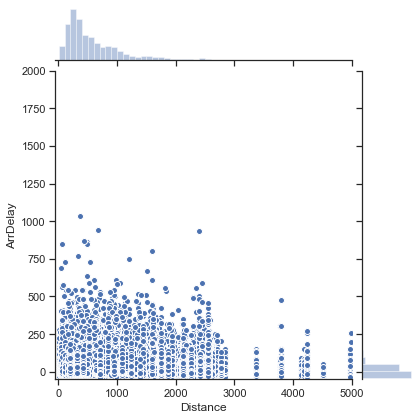

In [80]:
plt.figure(figsize=[10,8])
sns.jointplot(data=df, x="Distance", y="ArrDelay",
             annot_kws=dict(stat="r"), edgecolor="w", xlim=([-50,5000]), linewidth=1, ylim=([-50,2000]))
sns.set(style="ticks", color_codes=True)

<Figure size 720x576 with 0 Axes>

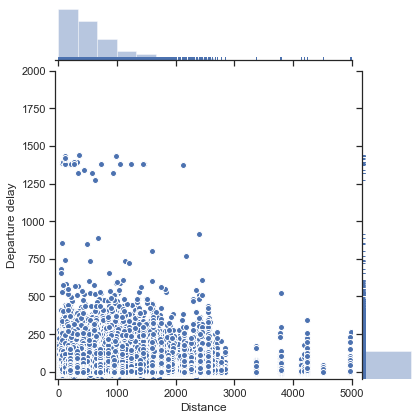

In [81]:
plt.figure(figsize=[10,8])
jp = sns.jointplot(data=df, x="Distance", y="DepDelay", marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"), edgecolor="w", xlim=([-50,5000]), linewidth=1, ylim=([-50,2000]))
jp.set_axis_labels("Distance", "Departure delay")

## Delays Grouped by Month

> This gives us an insight on the distribution of flights across the year. The chart simply shows that the delays increases with an increase in the month of the year

<Figure size 720x576 with 0 Axes>

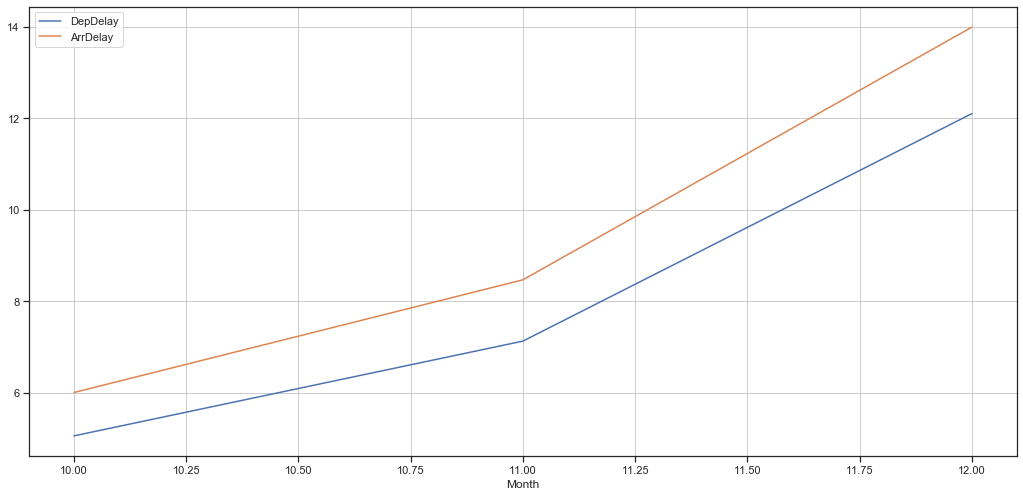

In [82]:
plt.figure(figsize=[10,8])
df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.grid(b=None, which='major', axis='both')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# Multivariate Visualization

> We will lok at the relationship of more two variables in our dataset.

### Best time of the day to travel
We could look at the best time of the day to travel from the dataset and observe that morning (day) flights are better when looking at flights delay

<Figure size 720x576 with 0 Axes>

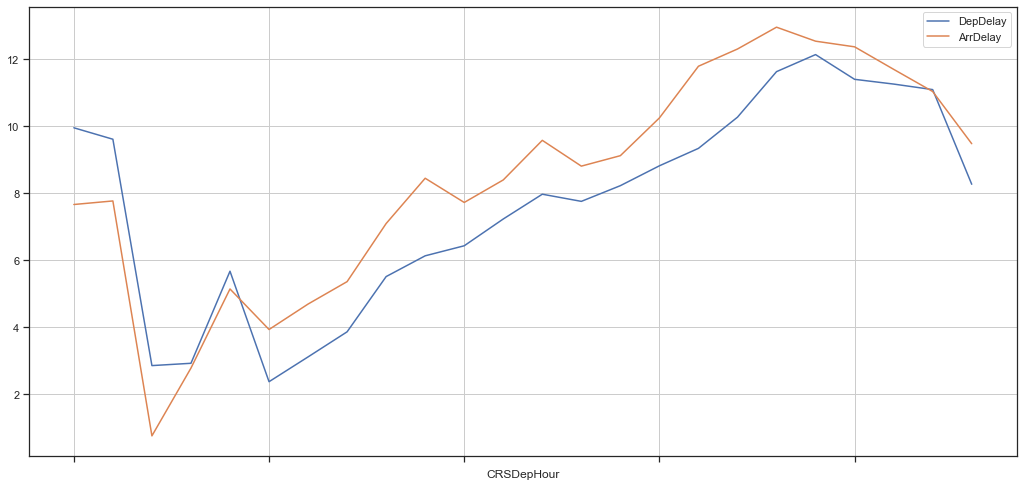

In [84]:
plt.figure(figsize=[10,8])
df['CRSDepHour'] = pd.cut(df.CRSDepTime, list(range(0, 2500, 100)))
df.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.grid(b=None, which='major', axis='both')

## Data Correlation
We can look at the relationship between the data an notice that we have a direct propotionality between distance, Arrival delay, Departure delay among other variables. This simply means, an increase in one of these variables affect the other

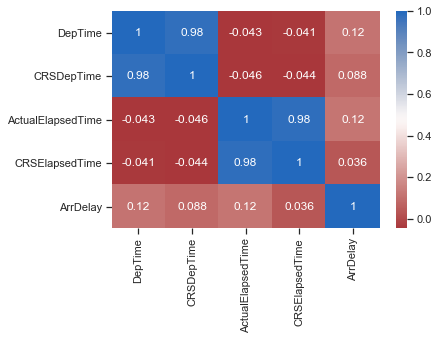

In [47]:
# correlation plot
numeric_cols = ['DepTime', 'CRSDepTime','ActualElapsedTime','CRSElapsedTime','ArrDelay']
#plt.figure(figsize=[12,6])
gr = sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="vlag_r");
# Turn on the grid
gr.grid()

### More Relationship
We could look at the pairplot to see how these numerical data are inter related

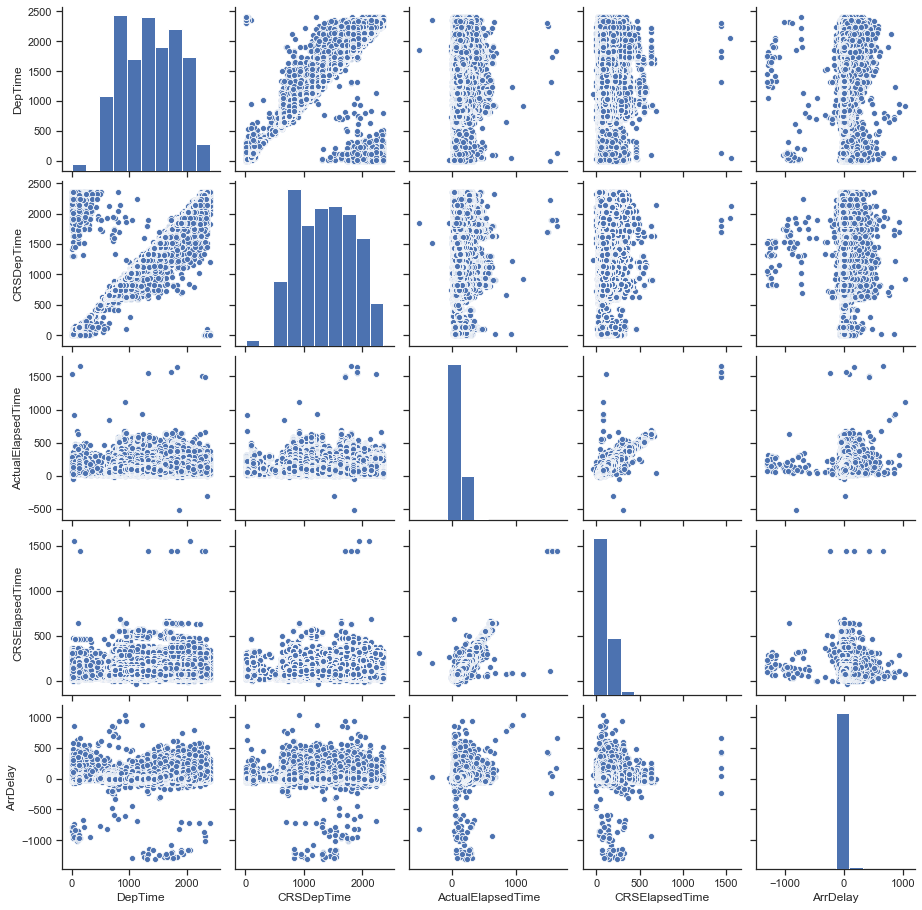

In [51]:
numeric_cols_ = ["DepTime", "CRSDepTime","ActualElapsedTime","CRSElapsedTime","ArrDelay"]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[numeric_cols])

### Key Insights for Presentation

<li>From findings, distance is a factor that affects the delay of Flights.  A larger distance affects delay of flights. It is logical to think that those travelling to a very far location are less compared to those trying to assess a less proximal area.</li>
<li>Weather would have  been another interesting trend to look at in the data but there had been Null values in the column so we had to remove it</li>
<li>It is correct to say that travelling in the evenings have more delay than in the mornings</li>
<li>The delay increases when end of the year is approached. This is logical because most people go on holidays within that period</li>

Thank you!